In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor
from sklearn import metrics

Data Collection and Analysis

In [2]:
#load the dataset from csv.file
sales_data=pd.read_csv('/content/advertising.csv')

In [3]:
#first 5 rom from datasframe
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
sales_data.shape

(200, 4)

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Categorical Features:



*   Sales
*   Radio
*   Newspaper




In [9]:
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Handling missing vlues
Mean-> average value
Mode-> Most repeated value

In [11]:
#mean value of Radio Column
sales_data['Radio'].mean()

23.264000000000006

In [13]:
sales_data['Radio'].fillna(sales_data['Radio'].mean())

0      37.8
1      39.3
2      45.9
3      41.3
4      10.8
       ... 
195     3.7
196     4.9
197     9.3
198    42.0
199     8.6
Name: Radio, Length: 200, dtype: float64

In [14]:
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [23]:
print(sales_data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [26]:
 sales_data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [27]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [28]:
sns.set()

<ipython-input-34-75602f2762c6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Newspaper'])


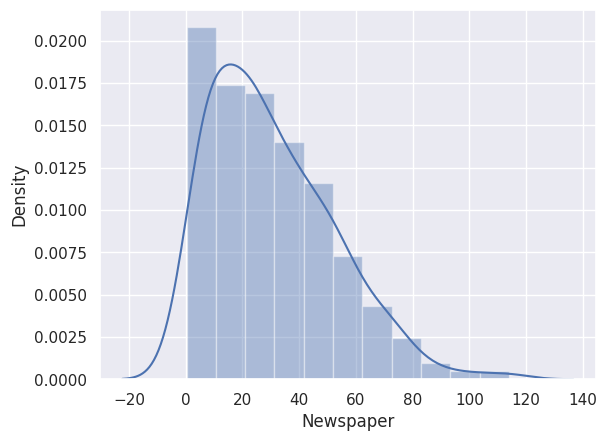

In [34]:

sns.distplot(sales_data['Newspaper'])
plt.show()

<ipython-input-35-46ff72d387f9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Radio'])


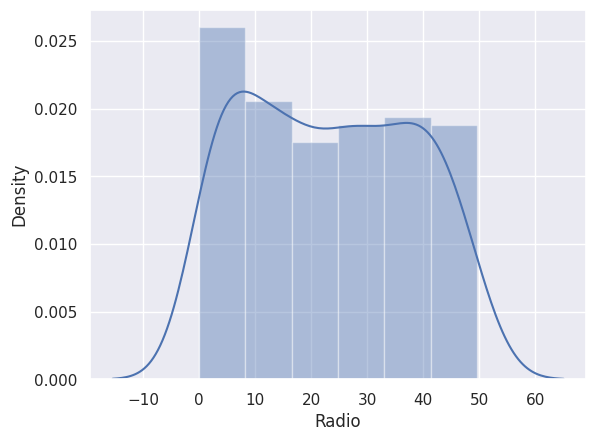

In [35]:
sns.distplot(sales_data['Radio'])
plt.show()

<ipython-input-36-dda89dab7e22>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Sales'])


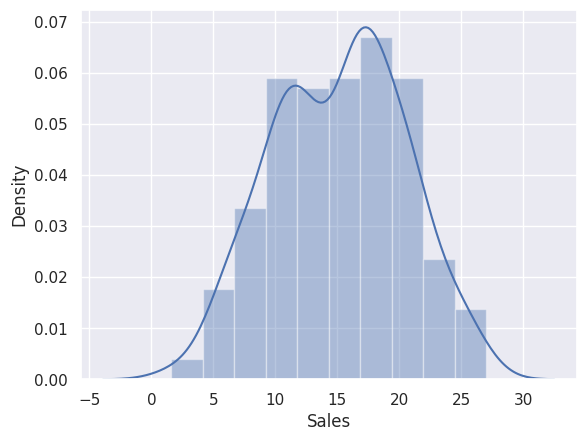

In [36]:
sns.distplot(sales_data['Sales'])
plt.show()

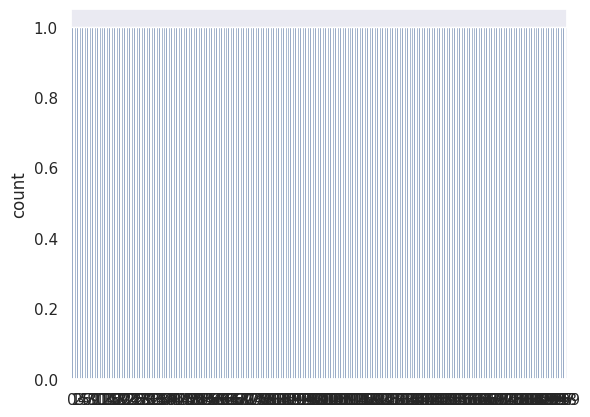

In [38]:
sns.countplot(sales_data['TV'])
plt.show()

Data Pre-Processing

In [39]:
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [49]:
sales_data['Newspaper']=(sales_data['Newspaper'])
sales_data['Radio']=(sales_data['Radio'])
sales_data['TV']= (sales_data['TV'])
sales_data['Sales']=(sales_data['Sales'])


In [50]:
sales_data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [51]:
X  = sales_data.drop(columns='Newspaper', axis=1)
Y  = sales_data['Newspaper']

Splitting features and Target

In [52]:
print(X)

        TV  Radio  Sales
0    230.1   37.8   22.1
1     44.5   39.3   10.4
2     17.2   45.9   12.0
3    151.5   41.3   16.5
4    180.8   10.8   17.9
..     ...    ...    ...
195   38.2    3.7    7.6
196   94.2    4.9   14.0
197  177.0    9.3   14.8
198  283.6   42.0   25.5
199  232.1    8.6   18.4

[200 rows x 3 columns]


In [53]:
print(Y)

0      69.2
1      45.1
2      69.3
3      58.5
4      58.4
       ... 
195    13.8
196     8.1
197     6.4
198    66.2
199     8.7
Name: Newspaper, Length: 200, dtype: float64


Splitting the data info Training data & Testing Data

In [56]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

In [57]:
print(X.shape, X_train.shape, X_test.shape)

(200, 3) (160, 3) (40, 3)


Machine learning model Training

In [61]:
regressor = XGBRFRegressor()

In [67]:
regressor.fit(X_train, Y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [68]:
training_data_prediction = regressor.predict(X_train)

In [71]:
#R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [72]:
print('R Squared value =',r2_train)

R Squared value = 0.662295717263764


# prediction on test data

In [73]:
test_data_prediction = regressor.predict(X_train)

In [74]:
print('R Squared value =',r2_train)

R Squared value = 0.662295717263764
